
### 【Pandas Tutorial】Lesson 1 数据读取和储存 - 知乎专栏
https://zhuanlan.zhihu.com/p/26218273

### 【Pandas Tutorial】Lesson 2 索引与切片 - 知乎专栏
https://zhuanlan.zhihu.com/p/26309877


In [1]:

%%javascript
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('f5', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.command_shortcuts.add_shortcut('ctrl-.', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('f5', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-.', {
    help : 'run cell',
    handler : function (event) {
        IPython.notebook.execute_cell();
        return false;}});
Jupyter.keyboard_manager.edit_shortcuts.add_shortcut('ctrl-enter', {
    help : 'none',
    // 防止与 Sublime hotkey Ctrl+Enter 冲突
    handler : function (event) {
        return false;}});

var patch = {CodeCell: {cm_config:{indentUnit: 2}}}
Jupyter.notebook.get_selected_cell().config.update(patch)

// 依据 ipynb 文件名, 给 cell 加上特定的背景色
String.prototype.hashCode = function() {
  var hash = 0, i, chr;
  if (this.length === 0) return hash;
  for (i = 0; i < this.length; i++) {
    chr   = this.charCodeAt(i);
    hash  = ((hash << 5) - hash) + chr;
    hash |= 0; // Convert to 32bit integer
  }
  return hash;
};

function random_hue_color(label, s, l) {
  // console.log(Math.abs(label.hashCode()))
  var hash_color = (Math.abs(label.hashCode()) % 360) / 360 * 100
  return `hsl(${hash_color}, ${s}%, ${l}%)`
}

var notebook_path = IPython.notebook.notebook_path
var color1 = random_hue_color(notebook_path, 20, 90)
var color2 = random_hue_color(notebook_path, 40, 80)

var css = document.createElement("style")
css.type = "text/css"
css.innerHTML = `div.cell {background-color: ${color1};}`
css.innerHTML +=`div.running {background-color: ${color2};}`
css.innerHTML +=`div.running.selected {background-color: ${color2};}`
css.innerHTML +='</style>'
document.body.appendChild(css);




<IPython.core.display.Javascript object>

### 生成DataFrame

In [2]:
# 首先先载入pandas包：

import pandas as pd 

In [4]:
import sein as s

In [6]:
# 之后我们创建一个DataFrame：

names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
BabyDataSet = list(zip(names,births)) /s

[(Bob, 968), (Jessica, 155), (Mary, 77), (John, 578), (Mel, 973)]


In [9]:
# 我们先是创建了names和births两个向量，然后将这两个向量通过zip函数合并，BabyDataSet现在是长这个样子的：
# [('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]
# 后，我们可以使用BabyDataSet创建一个DataFrame，命名为df：

df = pd.DataFrame(data=BabyDataSet, columns=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### 储存文件

In [10]:
# 接下来，我们可以用pandas.to_csv函数，把这个DataFrame存为一个csv文件，
# pandas里面存文件的函数名称基本都是这样一个格式，比如pandas.to_pickle等。
# 这里有两个参数index和header，选False的话，index和columns的名称就不会存入文件。

df.to_csv('births1880.csv', index=False, header=False)

### 读取文件

In [11]:
# 存好了之后，我们就可以根据路径读取这个csv文件“births1880.csv”，
# 读取文件的函数为pandas.read_csv，
# 其他类型文件的读取函数也类似，比如pandas.read_pickle

Location = './births1880.csv'
df = pd.read_csv(Location)
df

,Bob,968
0,Jessica,155
1,Mary,77
2,John,578
3,Mel,973


In [12]:
# 我们看到，由于我们当时存储的时候header=False，
# 在读取这个csv的时候也没有指定行名，
# 所以python自动将每列第一个变量作为了DataFrame的列名，
# 这显然是我们不愿意看到的。

# 为了改变这一情况，我们应该在read_csv的时候通过names属性申明列名是什么：

df = pd.read_csv(Location, names=['Names', 'Births'])
df

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77
3,John,578
4,Mel,973


### 数据分析

The most popular name


,Names,Births
4,Mel,973


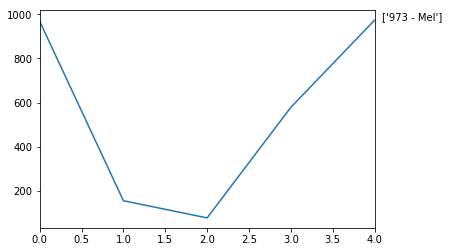

In [14]:
# 在原文的最后，作者还简单介绍了一个DataFrame数据分析的小案例，
# 其中的内容在后面都会有所涉及，先放在这里让大家简要了解一下：

import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

#把df这个DataFrame里的Births列进行画图操作
df['Births'].plot()

#max()函数可以获取Births列的最大值
MaxValue = df['Births'].max()

#先用df['Births'] == df['Births'].max()获取到最大值那一行的索引，
#之后便可以在df['Names']列中用同一个索引找到对应的行，最后通过values属性获取具体的name值
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

#生成将要在图片上显示的文字
Text = str(MaxValue) + " - " + MaxName

#把文字添加到图片上面
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
             xycoords=('axes fraction', 'data'), 
             textcoords='offset points')

#打印"The most popular name"与最大值
print("The most popular name")
df[df['Births'] == df['Births'].max()]

### 索引与切片

In [ ]:
# 了解了数据的存储与读取，
# 下面我们就要来探索如果在dataframe里快速去选择你想要的行与列了，
# 也即索引与切片。

# The usual preamble
import pandas as pd
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

figsize(15, 5)

In [15]:
# 首先我们可以利用set_option()先设置一下dataset的展示方式（比如行宽，比如最大展示的列数等），
# 这个完全是一个个性化的设置。
# 然后我们读取下列的数据集。

complaints = pd.read_csv('./311-service-requests.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
# 当你试图查看一个比较大的数据集时，
# 有时pandas不会展示具体的dataset内容，
# 而是一个summary，它会包括所有的列数，并告诉你每一行有多少非缺失值数据。

complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


In [23]:
complaints.describe(include='all')

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
count,1.110690e+05,111069,60270,111069,111069,111069,110613,79022,98807,84441,...,185,185,180,219,49,24,70,98143.000000,98143.000000,98143
unique,NaN,57872,35596,26,135,165,788,90,441,41189,...,37,38,2,160,17,2,39,NaN,NaN,50653
top,NaN,10/24/2013 12:00:00 AM,10/28/2013 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226,130 AUDUBON AVENUE,...,BQE/Gowanus Expwy,East/Long Island Bound,Roadway,Roadway,Flushing #1 Field,Staten Island Bound,Unknown,NaN,NaN,"(40.842708163812766, -73.93675169432969)"
freq,NaN,3659,1359,39067,39067,14200,14126,39067,1226,120,...,24,22,127,11,12,13,14,NaN,NaN,120
mean,2.651565e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.730821,-73.926738,NaN
std,4.694558e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086006,0.079563,NaN
min,2.642588e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.498949,-74.254437,NaN
25%,2.647433e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.667529,-73.971882,NaN
50%,2.651472e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724521,-73.931580,NaN
75%,2.655684e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807183,-73.882430,NaN


### 选择某一行列

In [24]:
# 想要选择dataframe的某一列，我们可以直接使用利用列名进行选择，
# 比如我们可以选择Compliant Type这一列：
complaints['Complaint Type']

# 另外一种写法是：
# complaints.变量名
# 不过我们还是推荐你使用前面一种选择方式。

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

In [25]:
# 如果你想选择整个dataframe的前五行，可以直接使用切片方式：df[:5]，
# 通常查看前几行可以帮助我们对整个数据集的数据有个初步的了解，

# 当然你也可以使用df.head()查看dataframe的“头部”数据。
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [26]:
# 我们现在把列选择和行选择结合一下，写的方式也很简单：

complaints['Complaint Type'][:5]

# 这个语句可以这样去理解，complaints['Complaint Type']选择了'Complaint Type'这一列，
# 然后[:5]是对这一列数据又进行了切片，结果如下：

# 当然，其实顺序并不关键，我们也可以这样写：
# complaints[:5]['Complaint Type']

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

### 同时选择多个列

In [27]:
# 如果我们想同时选择dataframe多个列怎么办？
# Pandas提供了一种很简单的方式获取columns的subset，
# 只要通过一个list的columns名进行索引即可：

complaints[['Complaint Type', 'Borough']]

# 你可以发现同单列'Complaint Type'相比，
# 其实我们这次就是把'Complaint Type'换成了一个list：['Complaint Type', 'Borough']，
# 其实这和python本身list的切片方式也很像，
# 得到的结果如下

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


In [28]:
# 当然我们如果想要看其中具体数据，可以再选取其前十行：

complaints[['Complaint Type', 'Borough']][:10]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
5,Noise - Commercial,QUEENS
6,Blocked Driveway,QUEENS
7,Noise - Commercial,QUEENS
8,Noise - Commercial,MANHATTAN
9,Noise - Commercial,BROOKLYN


### 同时选择多个行

In [34]:
# 其实原文的教程并没有这一节，不过我觉得不讲点loc和iloc以及ix就太对不住大家了。
# 这里我用另外的例子吧。

# 首先，我们先自己生成一个dataframe，
# 这个dataframe有三列（index为['d','e','f']），columns为['a','b','c']

import pandas as pd  
data = [[1,2,3], [4,5,6], [7,8,9]]  
index = ['row1','row2','row3']  
columns=['col_a','col_b','col_c']  
df = pd.DataFrame(data=data, index=index, columns=columns) 
df

,col_a,col_b,col_c
row1,1,2,3
row2,4,5,6
row3,7,8,9


In [35]:
# 通过行名获取行数据：

# 我们先可以初探一下loc的用法：

df.loc['row2']

# 从这个语句中我们可以看到，
# loc函数可以用来选择相应index名对应的那一行。
# 也就是说在这个例子里我们可以使用df.loc['d']选择第一行，
# 也可以用df.loc['e']选择第二行。
# 然而，如果你是用df.loc['a']就会报错，因为index里没有a。

col_a    4
col_b    5
col_c    6
Name: row2, dtype: int64

In [36]:
# 当然，loc函数也可以用来选择多行，比如下面的例子：
df.loc['row2':]

,col_a,col_b,col_c
row2,4,5,6
row3,7,8,9


In [37]:
df.loc[['row1','row3']]

# 其实大家可以这么理解，
# loc函数实际上是通过中括号中的内容作为索引在index里进行查找，
# 然后再通过获得的index切片再从dataframe里进行切片。

,col_a,col_b,col_c
row1,1,2,3
row3,7,8,9


### loc的扩展

In [38]:
# loc不仅可以选择行，还可以进行其他的扩展操作，比如：

df.loc['row1', ['col_b','col_c']] 

# 当你加入逗号之后，loc就默认会进行行与列的索引切片，
# 逗号前的内容作为行的索引下标，逗号后端内容就作为列的索引下标。

col_b    2
col_c    3
Name: row1, dtype: int64

### iloc，通过行号获取行数据

In [41]:
# iloc同loc相比，只是多加了一个'i'，
# 这个函数是通过行号获得数据的，
# 什么意思呢？看个例子就知道了：

df.iloc[0]

col_a    1
col_b    2
col_c    3
Name: row1, dtype: int64

In [42]:
# df.iloc[0]实际上就选择了第一行（因为python里索引是从0开始的），
# 也就是'row1'那一行，所以说，其实iloc和loc的用法是完全一样的，
# 只不过通过行名选择变成了通过行名对应的索引下标的选择。
# iloc也可以进行loc的所有操作，比如：

df.iloc[[0, 2]]

,col_a,col_b,col_c
row1,1,2,3
row3,7,8,9


In [46]:
print(df.iloc[1:])
print(df.iloc[1,[0,1]])

      col_a  col_b  col_c
row2      4      5      6
row3      7      8      9
col_a    4
col_b    5
Name: row2, dtype: int64


### ix，选择行与列的组合

In [47]:
# 我们之前看到，通过loc和iloc的扩展功能也可以实现对dataframe的行列的同时选择。
# 其实pandas针对这个功能有一个特别的函数：ix。

# 值得一提的是，ix既可以通过行（index）或列的名称对dataframe选取，
# 也可以直接通过行号和列号进行选取，还是之前那个dataframe：

df

,col_a,col_b,col_c
row1,1,2,3
row2,4,5,6
row3,7,8,9


In [51]:
# 我们下面用ix来选择右下角[5,6,8,9]这个小区域，可以用两种方式实现：

print(df.ix[1:,1:])
print(df.ix['row2':'row3','col_b':'col_c'])

      col_b  col_c
row2      5      6
row3      8      9
      col_b  col_c
row2      5      6
row3      8      9


### value_counts

In [52]:
# 我们如果想知道'Complaint Type'这一列出现最多的数据，
# 也即最常见的complaint type（投诉类型），
# 可以使用 .value_counts()

complaints['Complaint Type'].value_counts()

HEATING                                 14200
GENERAL CONSTRUCTION                     7471
Street Light Condition                   7117
DOF Literature Request                   5797
PLUMBING                                 5373
PAINT - PLASTER                          5149
Blocked Driveway                         4590
NONCONST                                 3998
Street Condition                         3473
Illegal Parking                          3343
Noise                                    3321
Traffic Signal Condition                 3145
Dirty Conditions                         2653
Water System                             2636
Noise - Commercial                       2578
ELECTRIC                                 2350
Broken Muni Meter                        2070
Noise - Street/Sidewalk                  1928
Sanitation Condition                     1824
Rodent                                   1632
Sewer                                    1627
Taxi Complaint                    

In [53]:
# 我们看到，这个.value_counts()函数可以对这一列出现的元素进行频数汇总，
# 返回的依然是一个Series，
# 我们可以再次切片获得其前10列（也就是最常出现的10种投诉类型）：

complaint_counts = complaints['Complaint Type'].value_counts()
complaint_counts[:10]

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

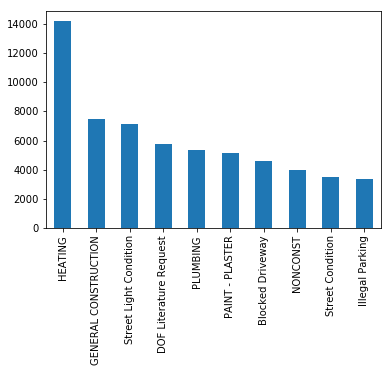

In [54]:
# 最后，还是老规矩，我们要把它画一下：

complaint_counts[:10].plot(kind='bar')